In [1]:
from pathlib import Path
import imageio
import os
import numpy as np

In [6]:
folder = Path("img4_stripes")
names = os.listdir(folder)
need = lambda x: ".png" in x
names = list(filter(need, names))

# K - соседей

In [7]:
from sklearn.model_selection import train_test_split
from pathlib import Path
import imageio
import os
import numpy as np

In [8]:
def distance(x_train, x_test):
    dist = ((x_train - x_test)**2).sum()
    return dist**0.5

In [9]:
def make_prediction(X_train, y_train, x, K = 1):
    array_dist = np.zeros(len(y_train))
    for i in range(len(y_train)):
        array_dist[i] = distance(X_train[i], x)
    idx = np.argpartition(array_dist, K)[:K]
    return y_train[idx].mean()

In [10]:
def error(X_train, y_train, X_test, y_test, K = 1):
    y_predicted = np.zeros(len(y_test))
    for i in range(len(y_test)):
        y_predicted[i] = make_prediction(X_train, y_train, X_test[i], K = K)
    return ((y_predicted - y_test)**2).mean(), y_predicted

In [11]:
def filtered(a):
    return a > 0.113

In [12]:
folder = Path("img2_stripes")
start = True
size = 1


names = os.listdir(folder)[:-1]
names.remove("Thumbs.db")
if start:
    names = names[:int(size*(len(names)))]
else: 
    names = names[int((1-size)*(len(names))): ]
names.sort(key= lambda x: int(x.split("_")[0]))

images = []
target = []
for idx in range(len(names)):
    images.append(np.array(imageio.imread(str(folder/names[idx]))))
    target.append(float(names[idx].split("_")[1]))
images = np.array(images)
target = np.array(target)
if filtered:
        images = images[filtered(target)]
        target = target[filtered(target)]


In [13]:
X_train, X_test = train_test_split(images, shuffle = False)
y_train, y_test = train_test_split(target, shuffle = False)

In [18]:
er, y_predicted = error(X_train, y_train, X_test, y_test, K = 10)

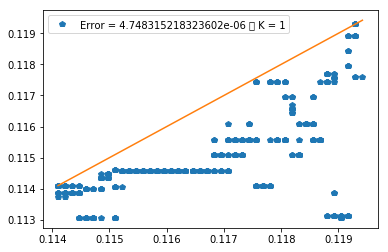

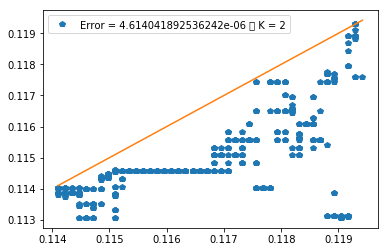

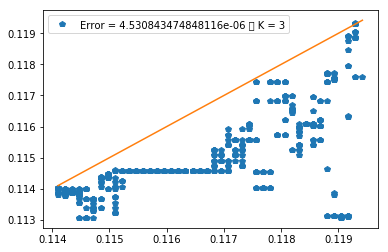

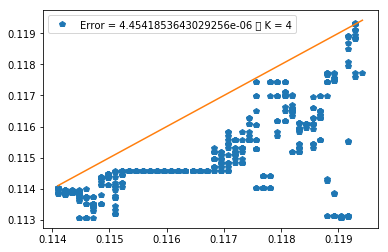

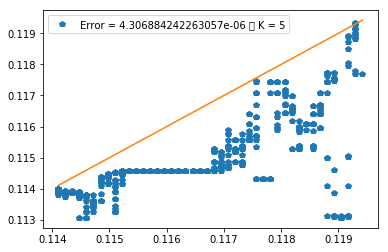

KeyboardInterrupt: 

In [294]:
for i in range(1, 10):
    er, y_predicted = error(X_train, y_train, X_test, y_test, K = i)
    plt.plot(y_test, y_predicted, 'p', label = f"Error = {er} \t K = {i}")
    plt.plot(y_test, y_test)
    plt.legend()
    plt.show()

In [15]:
er

4.748315218323602e-06

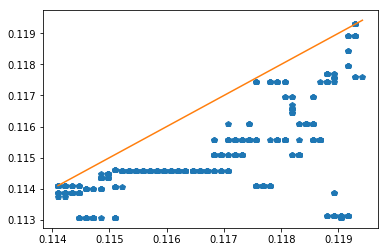

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(y_test, y_predicted, 'p')
plt.plot(y_test, y_test)

In [17]:
np.corrcoef(y_test, y_predicted)[0][1]

0.5925695001437064

In [186]:
target[-100:]

array([0.12263626, 0.12263626, 0.12263626, 0.12263626, 0.12263626,
       0.12263626, 0.12275995, 0.12275995, 0.12275995, 0.12275995,
       0.12275995, 0.12275995, 0.12275995, 0.12275995, 0.12288365,
       0.12288365, 0.12288365, 0.12288365, 0.12288365, 0.12300734,
       0.12300734, 0.12300734, 0.12300734, 0.12300734, 0.12300734,
       0.12313104, 0.12313104, 0.12313104, 0.12313104, 0.12313104,
       0.12313104, 0.12325474, 0.12325474, 0.12325474, 0.12325474,
       0.12325474, 0.12325474, 0.12337843, 0.12337843, 0.12337843,
       0.12337843, 0.12337843, 0.12337843, 0.12350213, 0.12350213,
       0.12350213, 0.12350213, 0.12350213, 0.12362582, 0.12362582,
       0.12362582, 0.12362582, 0.12362582, 0.12374952, 0.12374952,
       0.12374952, 0.12374952, 0.12374952, 0.12374952, 0.12387321,
       0.12387321, 0.12387321, 0.12387321, 0.12387321, 0.12387321,
       0.12399691, 0.12399691, 0.12399691, 0.12399691, 0.12399691,
       0.1241206 , 0.1241206 , 0.1241206 , 0.1241206 , 0.12412

In [187]:
a = np.array([5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15])

In [176]:
idx = np.argpartition(a, 5)[:5]

In [177]:
a[idx]

array([6, 5, 7, 8, 9])

In [288]:
cor = []
errors = []
ne = []
for i in range(5, 100, 5):
    er, y_pred = error(X_train, y_train, X_test, y_test, K = i)
    ne.append(i)
    cor.append(np.corrcoef(y_test, y_pred)[0][1])
    errors.append(er)

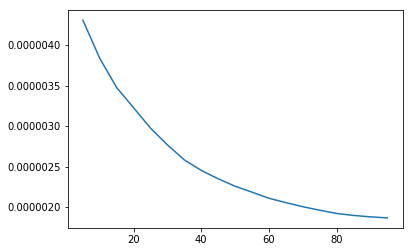

In [289]:
plt.plot(ne, errors)

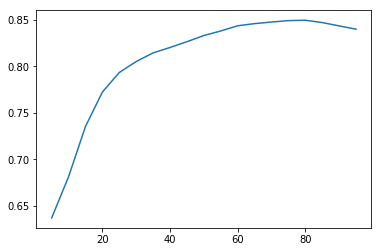

In [290]:
plt.plot(ne, cor)

In [242]:
errors = np.array(errors)

In [244]:
idx = np.argpartition(cor, 1)[:1]

In [245]:
idx

array([44])

In [246]:
ne[44]

980

In [306]:
from PIL import Image
import math

In [296]:
a = Image.open(str(folder/names[idx]))

In [318]:
width, height, _ = np.array(a).shape

In [314]:
width = math.floor(width/2)
height = math.floor(height/2)

resized_img = a.resize((width, height), Image.ANTIALIAS)

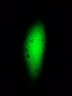

In [315]:
resized_img

In [316]:
np.array(resized_img).shape

(96, 72, 3)

In [319]:
height

192

In [313]:
144 / 2

72.0

In [5]:
import ImageDataset 

In [6]:
a, b = ImageDataset.train_test_split([6, 7])

AttributeError: module 'ImageDataset' has no attribute 'train_test_split'